# WELCOME HERE 

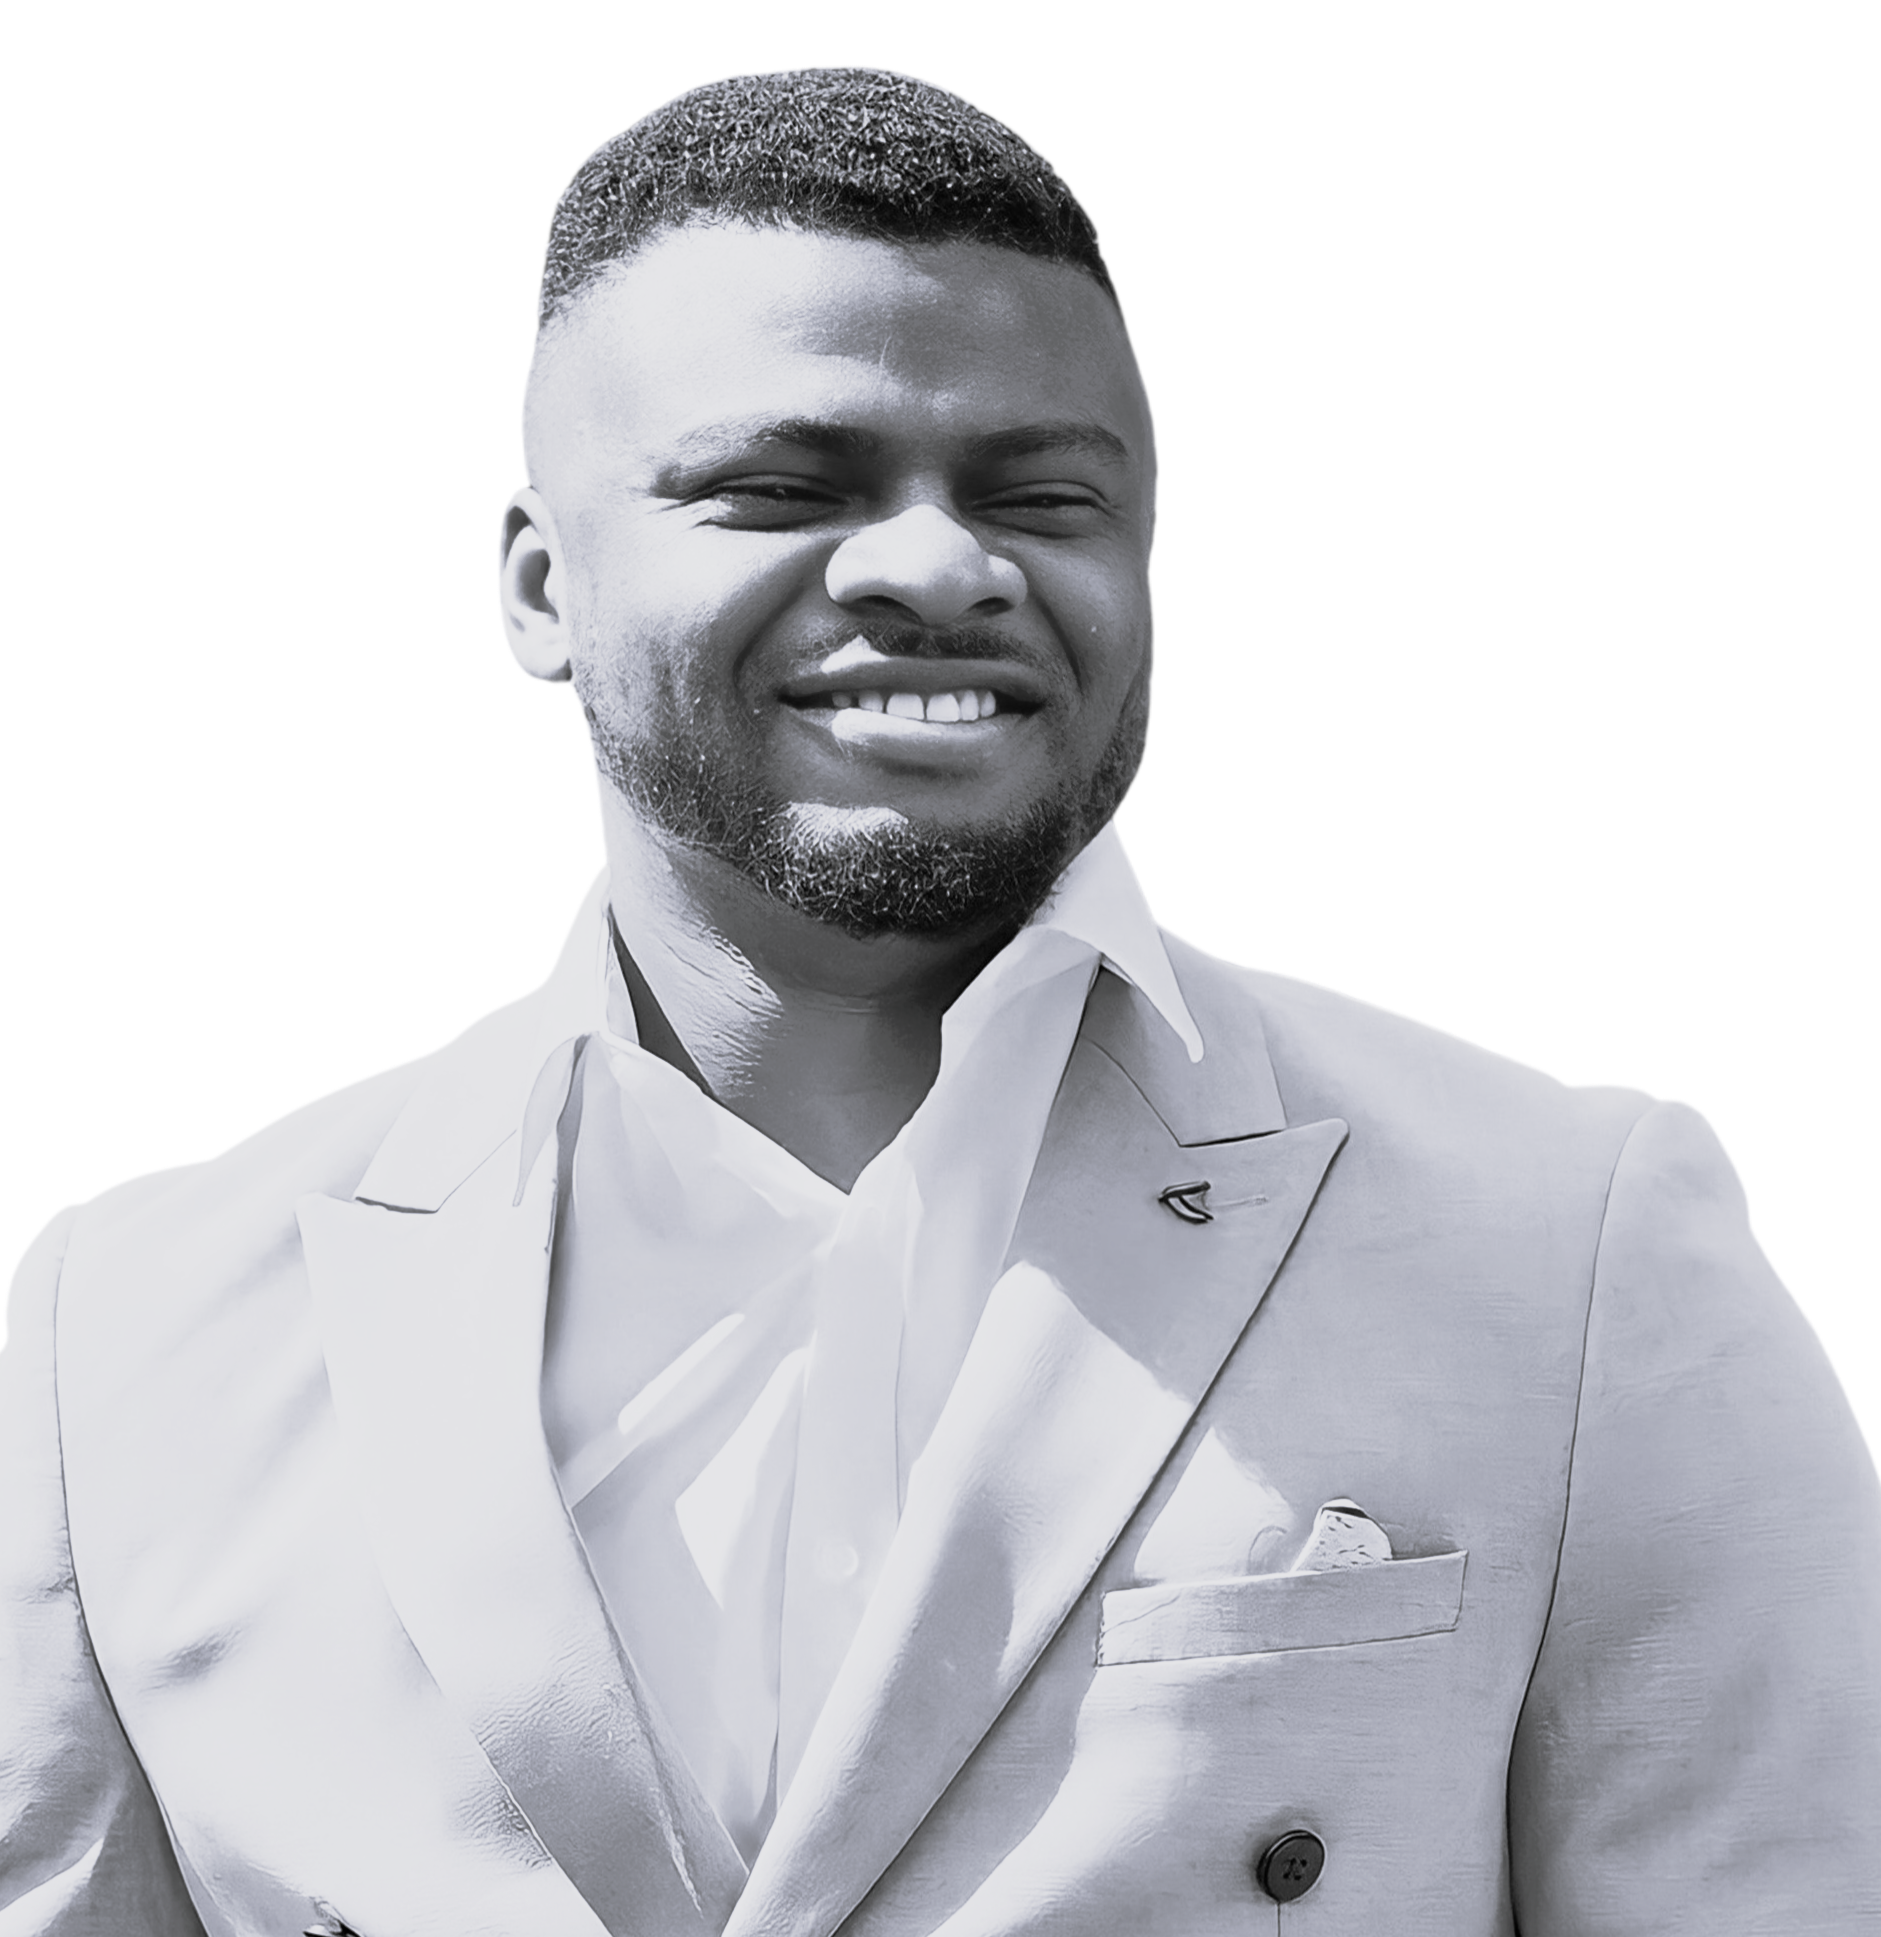

In [1]:
from PIL import Image

im = Image.open("C:\\Users\TOJMARK LTD\\DATA SCIENCE PROJECT\\Apple stock prediction project\\MYIMAGE.png")
display(im)

Hi, I'm a data enthusiast with a knack for making sense of numbers. I thrive on turning data into practical insights that drive business decisions. My background in marketing gives me an edge in understanding customer behavior. I love experimenting with data, using statistical tools and machine learning to find hidden patterns. My goal is to become a data scientist, supercharging my data skills. My journey is guided by a passion for ethical data practices and a strong belief in data's power to transform businesses.

# INTRODUCTION
The Forbes data was collected in 2022 and is a comprehensive collection of information about billionaires around the world. It provides valuable insights into the wealth distribution, industry dominance, and demographic characteristics of the world's wealthiest individuals. The data set includes key attributes such as the billionaire's name, net worth, age, country, source of wealth, and industry. Analyzing this data can help uncover trends, patterns, and relationships among billionaires, providing a deeper understanding of the global economic landscape. By exploring the Forbes data set, we can gain insights into the sources of wealth, geographic distribution, and other significant factors that contribute to the billionaire phenomenon. This data set serves as a valuable resource for studying wealth inequality, economic impact, and individual success in the modern world.

My objective is to perform exploratory data analysis (EDA) and glean valuable insights from this wealth of information. Through data visualization, statistical analysis, and data cleaning, I aim to uncover intriguing patterns and trends within the billionaire community. I'll be looking at aspects like the distribution of billionaires by age, wealth sources, and industries, among others.

This analysis can offer a unique glimpse into the world's wealthiest individuals, shedding light on factors influencing their success and the broader economic landscape. Additionally, it can provide valuable insights for investors, policymakers, and anyone interested in understanding global wealth distribution and the dynamics of billionaire fortunes.

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sklearn.__version__

'1.2.2'

In [2]:
data = pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE COURCES\\DATA SCIENCE PROJECTS\\forbes_richman.csv", 
                   encoding='latin-1')
data.head()

Rank                      Name Net Worth   Age        Country  \
0     1                 Elon Musk    $219 B  50.0  United States   
1     2                Jeff Bezos    $171 B  58.0  United States   
2     3  Bernard Arnault & family    $158 B  73.0         France   
3     4                Bill Gates    $129 B  66.0  United States   
4     5            Warren Buffett    $118 B  91.0  United States   

               Source               Industry  
0       Tesla, SpaceX             Automotive  
1              Amazon             Technology  
2                LVMH       Fashion & Retail  
3           Microsoft             Technology  
4  Berkshire Hathaway  Finance & Investments

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       2509 non-null   int64  
 1   Name       2509 non-null   object 
 2   Net Worth  2509 non-null   object 
 3   Age        2430 non-null   float64
 4   Country    2509 non-null   object 
 5   Source     2509 non-null   object 
 6   Industry   2509 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.3+ KB


In [4]:
data.describe()

Rank          Age
count  2509.000000  2430.000000
mean   1255.000000    64.296708
std     724.430236    13.357563
min       1.000000    19.000000
25%     628.000000    55.000000
50%    1255.000000    64.000000
75%    1882.000000    74.000000
max    2509.000000   100.000000

In [5]:
data.notnull().count()

Rank         2509
Name         2509
Net Worth    2509
Age          2509
Country      2509
Source       2509
Industry     2509
dtype: int64

# First removing the $ and B sign under the net worth columns and covert it to integer

In [6]:
# Remove dollar sign ($) and "B" from the Net Worth column
data['Net Worth'] = data['Net Worth'].str.replace('$', '').str.replace('B', '')

# Convert the Net Worth column to numeric
data['Net Worth'] = pd.to_numeric(data['Net Worth'])

# Print the updated column
data.head()

Rank                      Name  Net Worth   Age        Country  \
0     1                 Elon Musk      219.0  50.0  United States   
1     2                Jeff Bezos      171.0  58.0  United States   
2     3  Bernard Arnault & family      158.0  73.0         France   
3     4                Bill Gates      129.0  66.0  United States   
4     5            Warren Buffett      118.0  91.0  United States   

               Source               Industry  
0       Tesla, SpaceX             Automotive  
1              Amazon             Technology  
2                LVMH       Fashion & Retail  
3           Microsoft             Technology  
4  Berkshire Hathaway  Finance & Investments

In [7]:
#Let get the richest 
richest_individual = data[data['Net Worth'] == data['Net Worth'].max()]
richest_individual
#It shows elon musk is the richest person as at 2022

Rank       Name  Net Worth   Age        Country         Source    Industry
0     1  Elon Musk      219.0  50.0  United States  Tesla, SpaceX  Automotive

In [8]:
poorest_individual = data[data['Net Worth'] == data['Net Worth'].min()]
poorest_individual.tail(10)
#There are many indivudiua with 1 billionaire net worth

Rank                          Name  Net Worth   Age        Country  \
2499  2500                    Dean Solon        1.0  57.0  United States   
2500  2501                Yao Hsiao Tung        1.0  82.0      Singapore   
2501  2502                  Ken Kendrick        1.0  78.0  United States   
2502  2503                 Johanna Braun        1.0  42.0        Germany   
2503  2504                       Fu Gang        1.0  51.0          China   
2504  2505                  Guo Jiangang        1.0  55.0          China   
2505  2506  Vera Rechulski Santo Domingo        1.0  73.0         Brazil   
2506  2507                  Mike Speiser        1.0  51.0  United States   
2507  2508                   Yao Liangbo        1.0  53.0          China   
2508  2509              Ihor Kolomoyskyy        1.0  59.0        Ukraine   

                    Source          Industry  
2499         solar systems            Energy  
2500         Manufacturing     Manufacturing  
2501  banking, sports team            Sports  
2502    medical technology        Healthcare  
2503      pharma retailing        Healthcare  
2504  household appliances     Manufacturing  
2505                  beer   Food & Beverage  
2506              software        Technology  
2507   furniture retailing  Fashion & Retail  
2508  banking, investments       Diversified

In [9]:
#The top 10 billionaire 
top_10_individuals = data.nlargest(10, 'Net Worth')
top_10_individuals

Rank                      Name  Net Worth   Age        Country  \
0     1                 Elon Musk      219.0  50.0  United States   
1     2                Jeff Bezos      171.0  58.0  United States   
2     3  Bernard Arnault & family      158.0  73.0         France   
3     4                Bill Gates      129.0  66.0  United States   
4     5            Warren Buffett      118.0  91.0  United States   
5     6                Larry Page      111.0  49.0  United States   
6     7               Sergey Brin      107.0  48.0  United States   
7     8             Larry Ellison      106.0  77.0  United States   
8     9             Steve Ballmer       91.4  66.0  United States   
9    10             Mukesh Ambani       90.7  64.0          India   

               Source               Industry  
0       Tesla, SpaceX             Automotive  
1              Amazon             Technology  
2                LVMH       Fashion & Retail  
3           Microsoft             Technology  
4  Berkshire Hathaway  Finance & Investments  
5              Google             Technology  
6              Google             Technology  
7            software             Technology  
8           Microsoft             Technology  
9         diversified            Diversified

In [10]:
#The last 10 individual
last_10_individuals = data.nsmallest(10, 'Net Worth')
last_10_individuals.head(-1)

Rank                    Name  Net Worth   Age        Country  \
2410  2411    Karl Friedrich Braun        1.0  39.0        Germany   
2411  2412  Jorge Gallardo Ballart        1.0  80.0          Spain   
2412  2413      Polys Haji-Ioannou        1.0  62.0         Cyprus   
2413  2414             Jeff Lawson        1.0  44.0  United States   
2414  2415            Michael Rees        1.0  47.0  United States   
2415  2416           Jeff Sprecher        1.0  67.0  United States   
2416  2417             Ye Qiongjiu        1.0  67.0          China   
2417  2418            Guo Jiangang        1.0  55.0          China   
2418  2419      Jean-Pierre Cayard        1.0  79.0         France   

                    Source               Industry  
2410    medical technology             Healthcare  
2411       pharmaceuticals             Healthcare  
2412               EasyJet                Service  
2413              software             Technology  
2414        private equity  Finance & Investments  
2415       stock exchanges  Finance & Investments  
2416              software             Technology  
2417  household appliances          Manufacturing  
2418               spirits        Food & Beverage

# The Richest In The United State

In [11]:
richest_USA = data[data['Country'] == 'United States'].nlargest(10, 'Net Worth')
richest_USA

Rank               Name  Net Worth   Age        Country  \
0      1          Elon Musk      219.0  50.0  United States   
1      2         Jeff Bezos      171.0  58.0  United States   
3      4         Bill Gates      129.0  66.0  United States   
4      5     Warren Buffett      118.0  91.0  United States   
5      6         Larry Page      111.0  49.0  United States   
6      7        Sergey Brin      107.0  48.0  United States   
7      8      Larry Ellison      106.0  77.0  United States   
8      9      Steve Ballmer       91.4  66.0  United States   
11    12  Michael Bloomberg       82.0  80.0  United States   
13    14    Mark Zuckerberg       67.3  37.0  United States   

                Source               Industry  
0        Tesla, SpaceX             Automotive  
1               Amazon             Technology  
3            Microsoft             Technology  
4   Berkshire Hathaway  Finance & Investments  
5               Google             Technology  
6               Google             Technology  
7             software             Technology  
8            Microsoft             Technology  
11        Bloomberg LP  Media & Entertainment  
13            Facebook             Technology

In [12]:
#Let check the richest by different industries
richest_by_industry = data.groupby('Industry')['Net Worth'].max().reset_index()
richest_by_industry

Industry  Net Worth
0                   Automotive      219.0
1   Construction & Engineering       15.0
2                  Diversified       90.7
3                       Energy       17.2
4             Fashion & Retail      158.0
5        Finance & Investments      118.0
6              Food & Beverage       65.7
7           Gambling & Casinos       27.5
8                   Healthcare       24.3
9                    Logistics       41.4
10               Manufacturing       28.3
11       Media & Entertainment       82.0
12             Metals & Mining       30.8
13                 Real Estate       32.6
14                     Service       13.2
15                      Sports       10.7
16                  Technology      171.0
17                     Telecom       21.3

# The automotive industry has the highest net worth, follow by  construction & engineering

In [13]:
#let check industry with the most higest number of billionaire
# Count the number of billionaires by industry
industry_counts = data['Industry'].value_counts()

# Get the industry with the highest number of billionaires
most_common_industry = industry_counts.idxmax()
most_common_industry
#Finance & investment has the most hihest number of billionaire

'Finance & Investments'

In [14]:
#Let check the number of billionaire by each country
# Group the data by country and count the number of billionaires in each country
country_counts = data.groupby('Country').size().reset_index(name="Number of Billionaires")

#sort the country counts by the index
country_counts.sort_values(by="Number of Billionaires", ascending=False)
country_counts.reset_index(drop=True, inplace=True)

billionaire_by_countyr = country_counts.nlargest(10, 'Number of Billionaires')
billionaire_by_countyr

Country  Number of Billionaires
70   United States                     689
11           China                     509
28           India                     156
22         Germany                     124
54          Russia                      74
25       Hong Kong                      64
7           Brazil                      58
9           Canada                      56
32           Italy                      51
69  United Kingdom                      46

# Youngest billionaire

In [15]:
#let sort it by age
sorted_data = data.sort_values('Age')

# Get the youngest 10 billionaires
youngest_10 = sorted_data.head(10)
youngest_10 

Rank                  Name  Net Worth   Age        Country  \
1230  1231   Kevin David Lehmann        2.4  19.0        Germany   
1903  1904      Pedro Franceschi        1.5  25.0         Brazil   
2136  2137    Alexandra Andresen        1.3  25.0         Norway   
1832  1833           Wang Zelong        1.5  25.0          China   
2145  2146    Katharina Andresen        1.3  26.0         Norway   
1912  1913     Henrique Dubugras        1.5  26.0         Brazil   
1467  1468          Ryan Breslow        2.0  27.0  United States   
599    600  Gustav Magnar Witzoe        4.5  28.0         Norway   
408    409             Gary Wang        5.9  28.0  United States   
2230  2231          Stanley Tang        1.2  29.0  United States   

                       Source               Industry  
1230               drugstores       Fashion & Retail  
1903                  fintech  Finance & Investments  
2136              investments            Diversified  
1832                chemicals        Metals & Mining  
2145              investments            Diversified  
1912                  fintech  Finance & Investments  
1467      e-commerce software             Technology  
599              fish farming        Food & Beverage  
408   cryptocurrency exchange  Finance & Investments  
2230        food delivery app             Technology

# Relationship between Age and Net Worth of Billionaires

Correlation coefficient: 0.034914859191594504


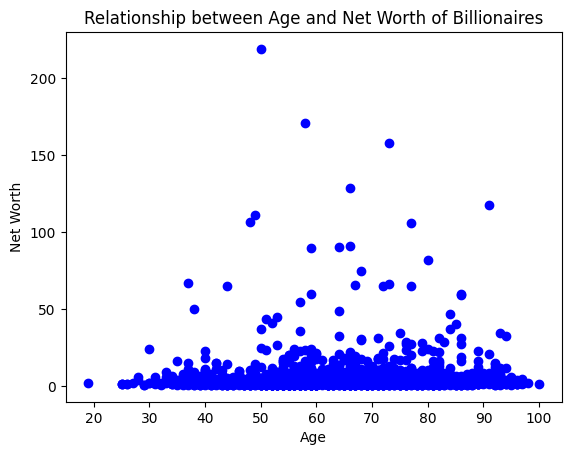

In [16]:
#Let check the relationship between  age a
# Extract the 'Age' and 'Net Worth' columns
age = data['Age']
net_worth = data['Net Worth']

# Create a scatter plot
plt.scatter(age, net_worth, color="blue")
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Relationship between Age and Net Worth of Billionaires')

# Calculate the correlation coefficient
correlation = age.corr(net_worth)
print('Correlation coefficient:', correlation)

# Display the scatter plot
plt.show()


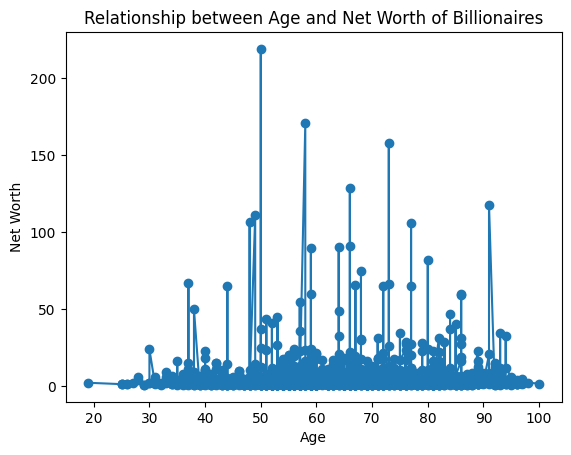

In [17]:
#Let try to visualise in another method

# Sort the DataFrame by age in ascending order
data_sorted = data.sort_values('Age')

# Extract the 'Age' and 'Net Worth' columns
age = data_sorted['Age']
net_worth = data_sorted['Net Worth']

# Plot the line graph
plt.plot(age, net_worth, marker='o')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Relationship between Age and Net Worth of Billionaires')

# Display the plot
plt.show()

# The distribution of number of billionnaire by industry

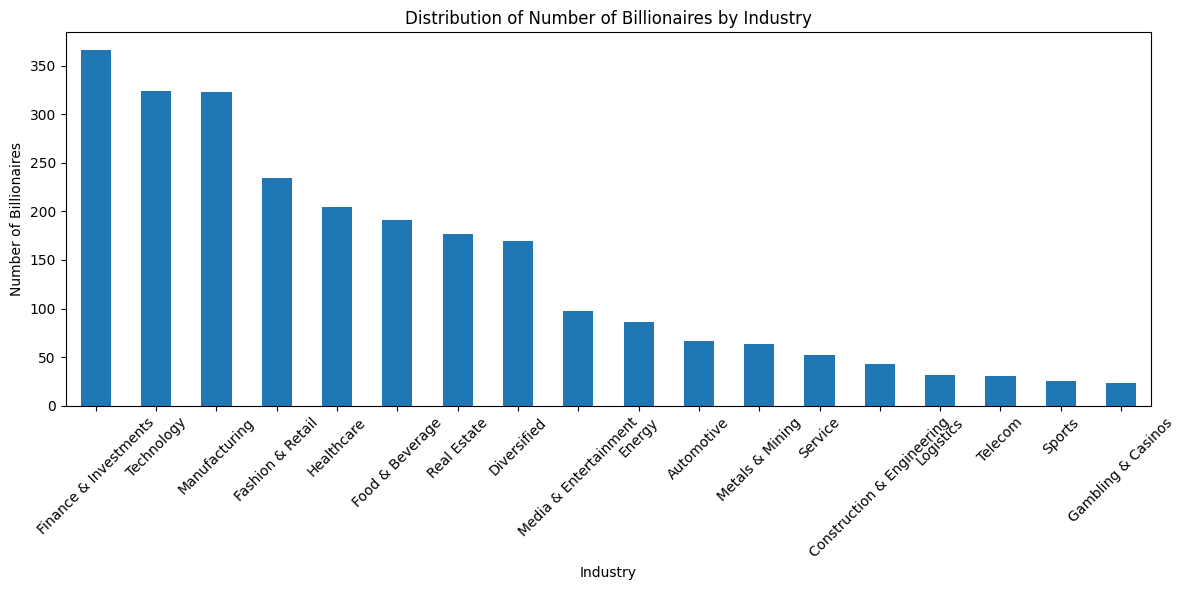

In [18]:
# Group the data by industry and count the number of billionaires in each industry
industry_counts = data['Industry'].value_counts()

# Plot the distribution of the number of billionaires by industry
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar')
plt.title('Distribution of Number of Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The distribution of number of billionnaire by country

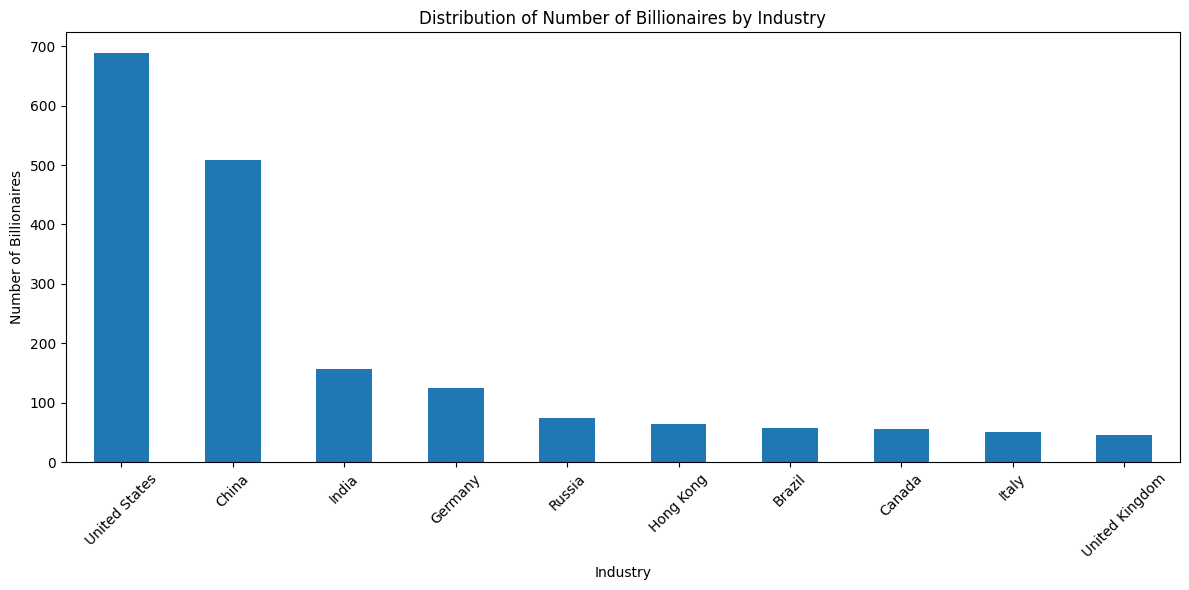

In [19]:
# Group the data by industry and count the number of billionaires in each country
country_counts = data['Country'].value_counts()
country_counts =country_counts.head(10)

# Plot the distribution of the number of billionaires by industry
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of Number of Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The most of source of wealth

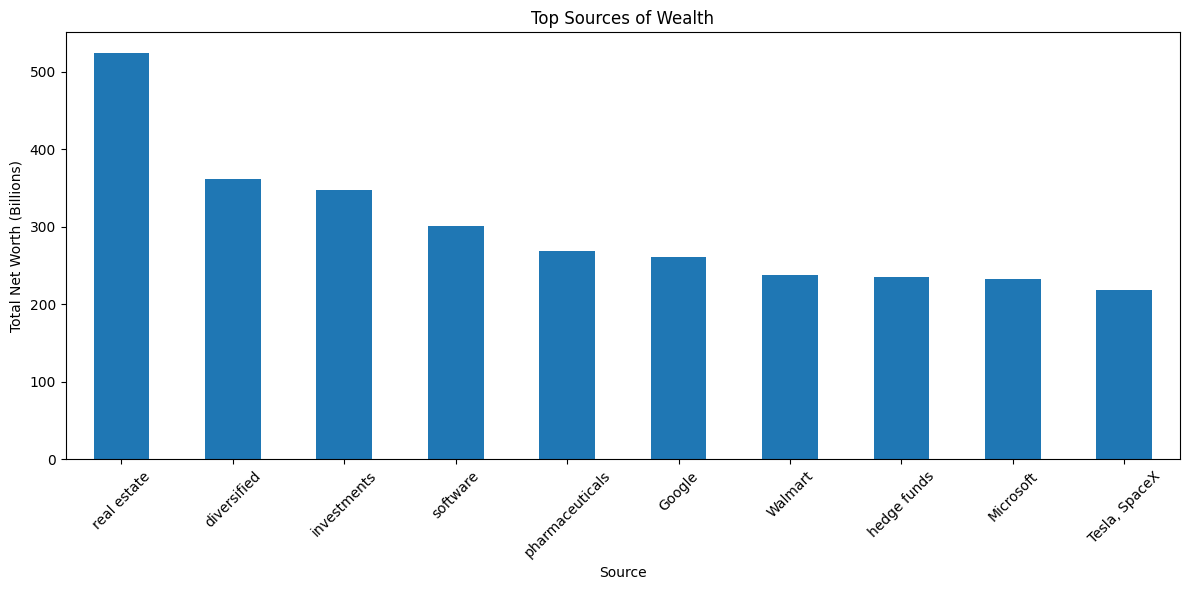

In [20]:
# Group the data by source and calculate the total net worth
source_net_worth = data.groupby('Source')['Net Worth'].sum().sort_values(ascending=False)

# Plot the top sources of wealth
plt.figure(figsize=(12, 6))
source_net_worth.head(10).plot(kind='bar')
plt.title('Top Sources of Wealth')
plt.xlabel('Source')
plt.ylabel('Total Net Worth (Billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# The distribution of number of billionnaire by Age

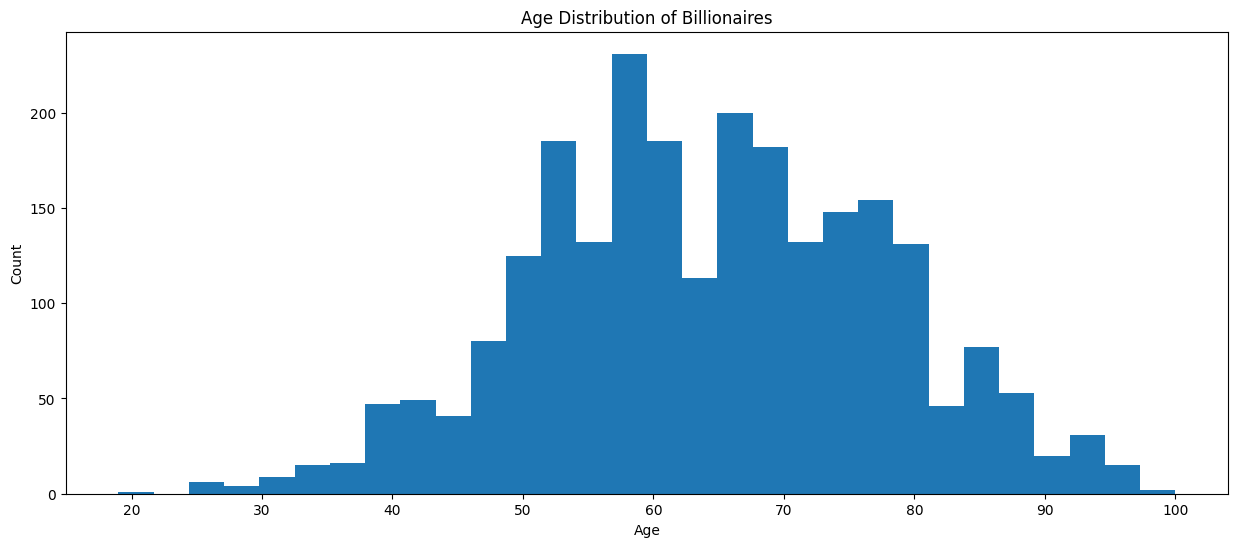

In [21]:
# Age distribution
plt.figure(figsize=(15, 6))
plt.hist(data['Age'], bins=30)
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Billionaires by Industry Usng Pie Chart

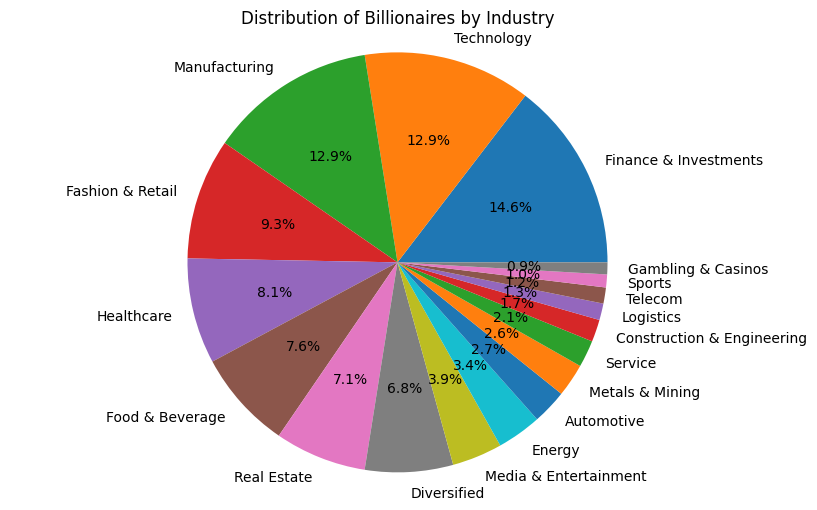

In [22]:
# Count the number of billionaires in each industry
industry_counts = data['Industry'].value_counts()

# Plot a pie chart of the distribution of billionaires by industry
plt.figure(figsize=(10, 6))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Billionaires by Industry')
plt.axis('equal')
plt.show()

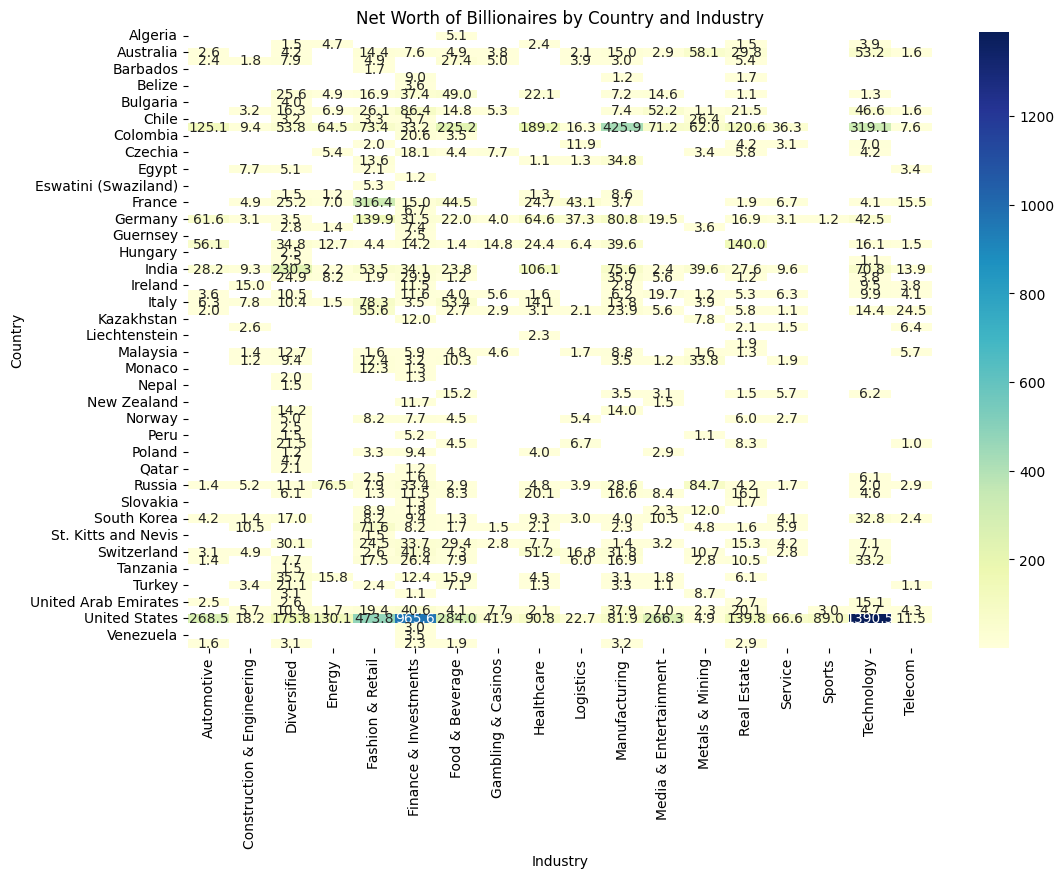

In [23]:
# Create a pivot table of the net worth of billionaires by country and industry
pivot_table = data.pivot_table(values='Net Worth', index='Country', columns='Industry', aggfunc='sum')

# Plot a heatmap of the net worth of billionaires by country and industry
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Net Worth of Billionaires by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.show()

# Distribution of Net Worth of Billionaires

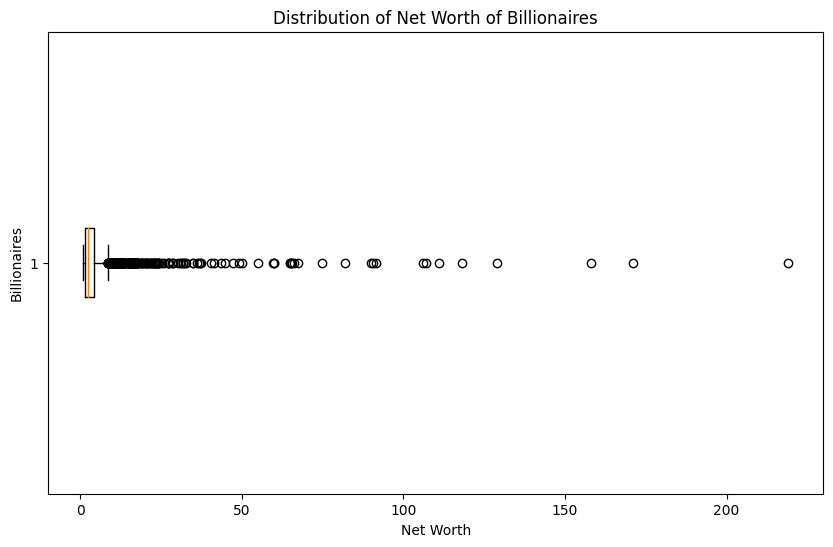

In [24]:
# Create a boxplot of the net worth of billionaires by industry
plt.figure(figsize=(10, 6))
plt.boxplot(data['Net Worth'], vert=False)
plt.title('Distribution of Net Worth of Billionaires')
plt.xlabel('Net Worth')
plt.ylabel('Billionaires')
plt.show()

# Create a line chart of the net worth of billionaires by age

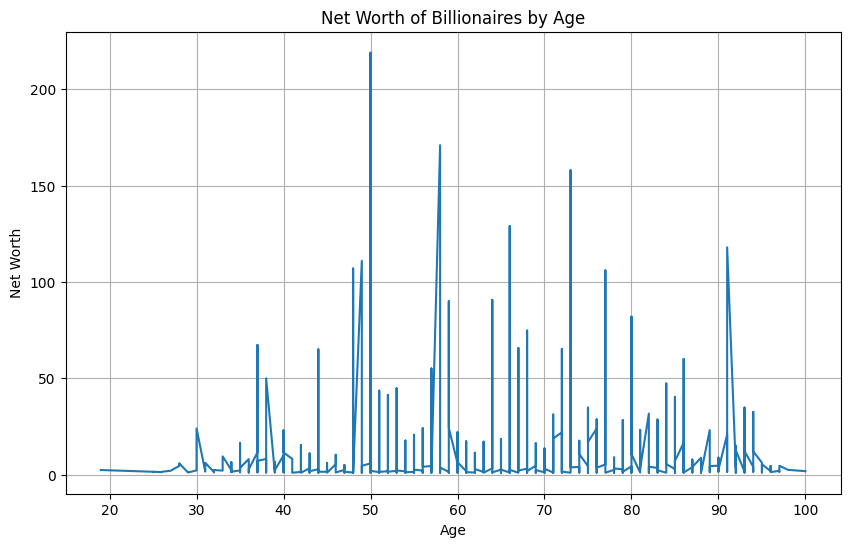

In [25]:
# Create a line chart of the net worth of billionaires by age
df_sorted = data.sort_values('Age')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Age'], df_sorted['Net Worth'])
plt.title('Net Worth of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.grid(True)
plt.show()

In [26]:
data['Age'] = data['Age'].replace('.0', '')

# Convert the Net Worth column to numeric
data['Age'] = pd.to_numeric(data['Age'])

# Print the updated column
data.head()

Rank                      Name  Net Worth   Age        Country  \
0     1                 Elon Musk      219.0  50.0  United States   
1     2                Jeff Bezos      171.0  58.0  United States   
2     3  Bernard Arnault & family      158.0  73.0         France   
3     4                Bill Gates      129.0  66.0  United States   
4     5            Warren Buffett      118.0  91.0  United States   

               Source               Industry  
0       Tesla, SpaceX             Automotive  
1              Amazon             Technology  
2                LVMH       Fashion & Retail  
3           Microsoft             Technology  
4  Berkshire Hathaway  Finance & Investments

# Time-series data using motion charts.

# Net Worth of Billionaires

In [27]:
import plotly.express as px
fig = px.scatter(data, x='Age', y='Net Worth', color='Industry',
                 animation_group='Name',
                 hover_name='Name', range_x=[min(data['Age']), max(data['Age'])],
                 range_y=[min(data['Net Worth']), max(data['Net Worth'])])
fig.update_layout(title='Net Worth of Billionaires',
                  xaxis_title='Age', yaxis_title='Net Worth')
fig.show()


# Net Worth of Billionaires by Age

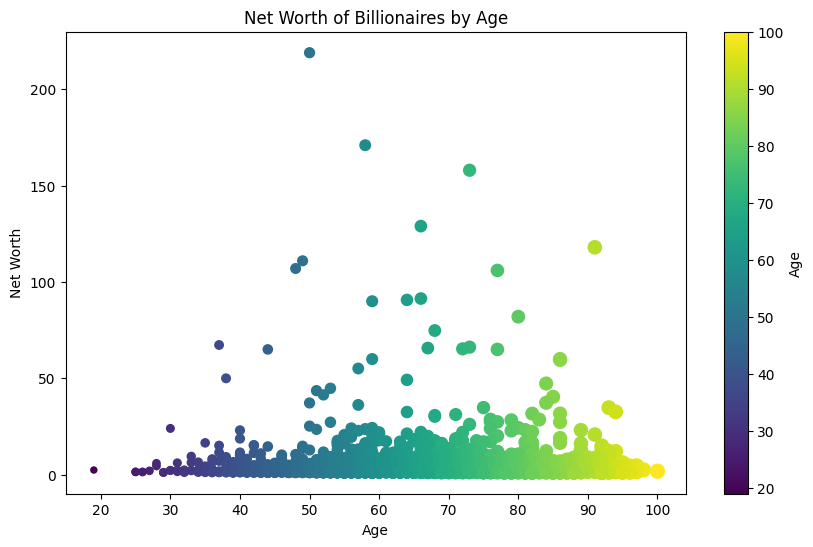

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Net Worth'],  c=data['Age'], s=data['Age'])
plt.title('Net Worth of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.colorbar(label='Age')
plt.show()

In [29]:
data.to_excel('CleanedFrobesbilloniare.xlsx', index=False)


This report provides a comprehensive overview of the characteristics, wealth distribution, and economic impact of billionaires. The analysis sheds light on the industries driving billionaire wealth, the demographic profile of billionaires, and their contributions to economies. Visualizations enhance the presentation of insights, making it easier to grasp key trends and patterns. The report concludes with recommendations for promoting equitable growth and harnessing the potential of billionaire wealth for broader societal benefits.

# THE END 